# 原始感知及算法实现

In [1]:
import numpy as np
import pandas as pd

In [88]:
iris = pd.read_csv("iris.csv")
iris

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0
...,...,...,...,...,...
145,6.1,3.0,4.6,1.4,1
146,5.2,4.1,1.5,0.1,0
147,6.7,3.1,4.7,1.5,1
148,6.7,3.3,5.7,2.5,2


In [89]:
#只选取两种标签，替换为1和-1；为了画图，只选取两个特征
iris = iris.drop(iris[iris['Species'] == 2].index, axis=0)
iris = iris.replace(0, -1)
iris = iris.drop(columns=['Petal Length', 'Petal Width'])
iris

,Sepal Length,Sepal Width,Species
1,5.0,2.3,1
3,4.9,3.1,-1
4,5.7,3.8,-1
5,4.4,3.2,-1
6,5.4,3.4,-1
...,...,...,...
144,5.8,2.7,1
145,6.1,3.0,1
146,5.2,4.1,-1
147,6.7,3.1,1


In [105]:
#获取训练集X、y
data = np.array(iris)
X, y = data[:, :-1], data[:, -1]
data[:10]

array([[ 5. ,  2.3,  1. ],
       [ 4.9,  3.1, -1. ],
       [ 5.7,  3.8, -1. ],
       [ 4.4,  3.2, -1. ],
       [ 5.4,  3.4, -1. ],
       [ 6.7,  3.1,  1. ],
       [ 5.1,  3.7, -1. ],
       [ 5.2,  2.7,  1. ],
       [ 6.9,  3.1,  1. ],
       [ 5.8,  4. , -1. ]])

In [118]:
# 初始化w、b、η
w = np.ones(len(data[0]) - 1, dtype = np.float32)
b = 0
η = 0.1

In [119]:
count = 0
while True:
    flag = 0 #标记是否有误分类点
    count += 1
    if (count / 100) == round(count / 100):
        print('第' + str(count) + '次迭代：' + 'w = ' + str(w) + ', b = ' + str(b))
    for i in range(len(data)):
        if y[i] * (np.inner(w, X[i]) + b) <= 0:
            w = w + η * np.dot(y[i], X[i])
            b = b + η * y[i]
            flag = 1
            break
    
    if flag == 0:
        break
print('第' + str(count) + '次迭代：' + 'w = ' + str(w) + ', b = ' + str(b))

第100次迭代：w = [ 1.4 -2.2], b = -0.10000000000000003
第200次迭代：w = [ 2.85 -4.19], b = -0.10000000000000003
第300次迭代：w = [ 3.29 -6.34], b = -0.30000000000000004
第400次迭代：w = [ 4.35 -7.04], b = -0.7
第500次迭代：w = [ 5.02 -7.64], b = -1.0999999999999999
第600次迭代：w = [ 4.94 -9.46], b = -1.3
第700次迭代：w = [ 5.43 -9.92], b = -1.7000000000000004
第800次迭代：w = [ 5.82 -9.72], b = -2.3000000000000007
第900次迭代：w = [ 6.1  -9.66], b = -2.9000000000000012
第1000次迭代：w = [ 6.53 -9.39], b = -3.5000000000000018
第1100次迭代：w = [ 5.8 -9.9], b = -4.300000000000001
第1200次迭代：w = [ 6.01 -9.92], b = -4.899999999999999
第1300次迭代：w = [ 6.31 -9.83], b = -5.4999999999999964
第1400次迭代：w = [ 6.74 -9.54], b = -6.099999999999994
第1500次迭代：w = [ 7.02 -9.38], b = -6.699999999999992
第1600次迭代：w = [ 7.21 -9.33], b = -7.29999999999999
第1700次迭代：w = [ 6.48 -9.73], b = -8.099999999999987
第1800次迭代：w = [ 6.3  -9.38], b = -8.899999999999984
第1900次迭代：w = [ 7.34 -8.86], b = -9.299999999999983
第2000次迭代：w = [ 7.04 -9.27], b = -9.89999999999998
第2100次迭代：w 

No handles with labels found to put in legend.


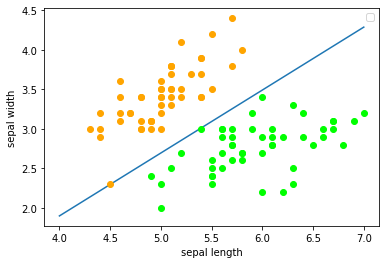

In [93]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
x_ = np.linspace(4, 7, 10)
y_ = -(w[0] * x_ + b) / w[1]
# 画出这条直线
plt.plot(x_, y_)
# 画出数据集的散点图
for i in data:
    if i[-1] == 1:
        plt.plot(i[0], i[1], 'bo', c = 'lime')
    else:
        plt.plot(i[0], i[1], 'bo', c = 'orange')

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

# 调用sklearn的Perceptron模块

In [94]:
from sklearn.linear_model import Perceptron

In [95]:
clf = Perceptron(fit_intercept=True, max_iter=1000, tol=None, shuffle=False, eta0 = 0.1)
clf.fit(X, y)
# 输出参数w, b
print('w = ' + str(clf.coef_) + ', b = ' + str(clf.intercept_))

w = [[ 7.07 -8.84]], b = [-11.5]


No handles with labels found to put in legend.


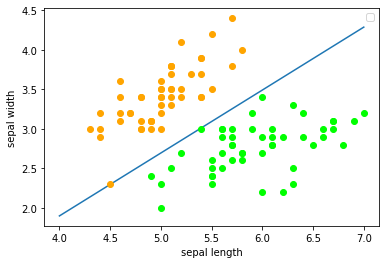

In [96]:
x_ = np.linspace(4, 7, 10)
y_ = -(w[0] * x_ + b) / w[1]
# 画出这条直线
plt.plot(x_, y_)
# 画出数据集的散点图
for i in data:
    if i[-1] == 1:
        plt.plot(i[0], i[1], 'bo', c = 'lime')
    else:
        plt.plot(i[0], i[1], 'bo', c = 'orange')

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()